### Calcul Matriciel : estimation des valeurs propres d’une matrice diagonalisable. 
#### Méthode de la puissance itérée - méthode de déflation


In [8]:
#bibliothèques utilisées:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("all done")

all done


### Travail à réaliser : calcul des valeurs propre d’une matrice

Soit la matrice $\mathbf{A} \in M_{3,3}(\mathbb{R}))$ tel que:


$$
\mathbf{A}
=
\begin{bmatrix}
-261 & 209 & -49 \\
-530 & 422 & -98 \\
-800 & 631 & -144 \\
\end{bmatrix}
$$

Question 1: Calculer les vecteur propres de $\mathbf{A}$, en utilisant la routine de numpy « linalg.eig »

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [9]:
A = np.array([[-261, 209, -49],
              [-530, 422, -98],
              [-800, 631, -144]])


#votre code ici:
eigenvalues, eigenvectors = np.linalg.eig(A) # eigenvalues contient les valeurs propres et eigenvectors contient les vecteurs propres

print(eigenvalues,eigenvectors)

[10.  3.  4.] [[-0.26726124  0.25925926  0.46135274]
 [-0.53452248  0.51851852  0.70977344]
 [-0.80178373  0.81481481  0.53233008]]


Question 2: Créer une fonction python « PuissIter » pour implémenter l’Algorithme 1 et trouver la valeur propre de plus grand module (utilisez la routine numpy « linalg.norm » pour la normalisation des vecteurs):

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [4]:
# Define a function PuissIter_V1 that implements the power iteration algorithm
def PuissIter_V1(A, x0, Maxiter):
    
    # Initialize arrays to store eigenvalues, eigenvector, and errors
    lambdas = []
    x = [x0]

    for k in range(1,Maxiter+1):
        x.append( np.dot( A , x[k-1] ) )
        x[k] =  x[k] /  np.linalg.norm( x[k] )
        lambdas.append( np.dot( np.dot( x[k].transpose() , A ) , x[k] ) )
    
    # Return the estimated max eigenvalue (lambda_max), final eigenvector (u), final iteration count (k)
    return lambdas , x[k] , k

#test:
x0 = np.random.rand(len(A)) #initialisation du vecteur x0
Maxiter = 100 

lambdas, final_u,k = PuissIter_V1(A, x0, Maxiter)

print(lambdas[-1])

10.00000000000233


Question 3: Faire varier la variable "𝑴𝒂𝒙𝒊𝒕𝒆𝒓" et représenter l’évolution de l’estimée de la plus grande valeur propre $𝜆_3$ en fonction de la variable "𝑴𝒂𝒙𝒊𝒕𝒆𝒓":

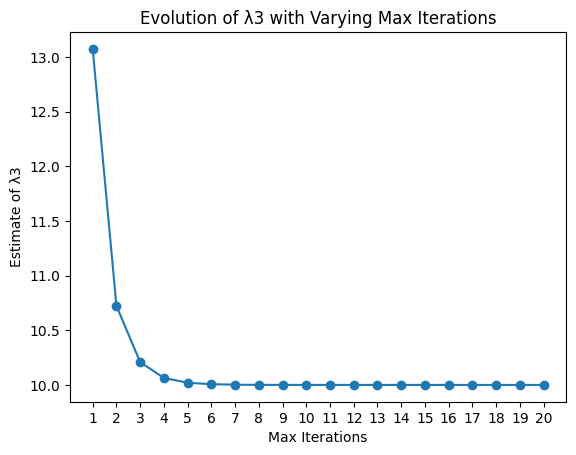

In [5]:
def vary_Maxiter_and_plot(A, x0, max_Maxiter):
    maxiters = range(1, max_Maxiter + 1)

    lambda3_estimates = PuissIter_V1(A, x0, max_Maxiter)[0]

    # Visualisation des résultats:
    plt.plot(maxiters, lambda3_estimates, marker='o')
    plt.xlabel('Max Iterations')
    plt.ylabel('Estimate of λ3')
    plt.title('Evolution of λ3 with Varying Max Iterations')
    
    # Set x-axis ticks to integers
    plt.xticks(maxiters)    
    
    plt.show()

    
x0 = np.random.rand(len(A)) #initialisation du vecteur x0
max_Maxiter = 20

vary_Maxiter_and_plot(A, x0, max_Maxiter)

Question 4: Modifier la fonction « puissIter » pour que le critère d’arrêt de l’Algorithme 1 ne soit pas le nombre maximum d’itérations "𝑴𝒂𝒙𝒊𝒕𝒆𝒓" , mais plutôt la différence (notée   "𝑻𝒐𝒍") entre les normes de   $𝒙_{𝒌+𝟏}$ et $𝒙_𝒌$.
Utiliser linalg.norm pour calculer l'erreur à chaque itération.

In [6]:
err[k] = np.linalg.norm(u - x0)

NameError: name 'u' is not defined

In [ ]:
def PuissIter_V2(A, x0, Tol = 1e-9):
    k = 0  # Counter
    lambdas = []
    errs = [1]
    x = [x0]

    while errs[k] > Tol:
        k+=1
        x.append( np.dot( A , x[k-1] ) )
        x[k] =  x[k] /  np.linalg.norm( x[k] )
        lambdas.append( np.dot( np.dot( x[k].transpose() , A ) , x[k] ) )
        errs.append( np.linalg.norm(x[k] - x[k-1]) )

    # Return the estimated eigenvalues, final eigenvector, iteration count, and errors
    return np.array(lambdas), x[k], k, np.array(errs)


x0 = np.random.rand(len(A))
Tol = 1e-9

lambda_values, final_u, k, errors = PuissIter_V2(A, x0, Tol)

print(lambda_values, k)

[12.9272202  10.68289088 10.19309037 10.05734645 10.01731128 10.00526644
 10.00161189 10.00049661 10.00015422 10.00004836 10.00001535 10.00000494
 10.00000162 10.00000054 10.00000018 10.00000006 10.00000002 10.00000001] 18


Question 5: Modifier la fonction « puissIter » pour que les deux critères d’arrêts : le nombre maximum d’itérations "𝑴𝒂𝒙𝒊𝒕𝒆𝒓" et la différence,"𝑻𝒐𝒍", entre les normes de 𝒙𝒌+𝟏 et 𝒙𝒌 soient pris en compte tous les deux.

In [11]:
def PuissIter_V3(A, x0, Maxiter, Tol):
    k = 0  # Counter
    lambdas = []
    errs = [1]
    x = [x0]

    while errs[k] > Tol and k < Maxiter:
        k+=1
        x.append( np.dot( A , x[k-1] ) )
        x[k] =  x[k] /  np.linalg.norm( x[k] )
        lambdas.append( np.dot( np.dot( x[k].transpose() , A ) , x[k] ) )
        errs.append( np.linalg.norm(x[k] - x[k-1]) )
    
    # Return the estimated eigenvalues, final eigenvector, iteration count, and errors
    return np.array(lambdas), x[k], k, np.array(errs)


#test: 
x0 = np.random.rand(len(A))
Maxiter = 100
Tol = 1e-9

lambda_values, final_u, k, errors = PuissIter_V3(A, x0, Maxiter, Tol)

print(lambda_values, k)

[13.31370578 10.78284952 10.2311039  10.07295496 10.02378741 10.00794086
 10.00270869 10.00094367 10.00033558 10.00012167 10.0000449  10.00001683
 10.00000639 10.00000246 10.00000095 10.00000037 10.00000015 10.00000006
 10.00000002 10.00000001] 20


Question 6: Créer une fonction Matlab « Defl » pour estimer les deux autres valeurs propres $𝜆_2$ et $𝜆_1$. Utiliser la dernière version de la fonction PuissIter (V3):

use np.outer for outer product calculation: https://en.wikipedia.org/wiki/Outer_product



In [12]:
def Defl(A, x0, Maxiter, Tol):
    n = A.shape[0]
    B = A.copy()  # Initialization
    lambda_Glob = []
    err = []
    k_glob = []
    U = []
    
    for i in range(n):
        lambda_values, final_u, k, errors = PuissIter_V3(B, x0, Maxiter, Tol)
        
        lambda_Glob.append(lambda_values)
        k_glob.append(k)
        U.append(final_u)
        err.append(errors)

        B = B - lambda_Glob[i][-1] * np.outer( U[i], U[i] )

    return lambda_Glob, U,k_glob, err

#test:
Maxiter = 200  
Tol = 1e-10  
lambda_values_global, U_final,k_final, errors_final = Defl(A, x0, Maxiter, Tol)

print(k_final)

[23, 80, 4]


Question 7: En utilisant Defl, refaire la question 3 pour $𝜆_2$ et $𝜆_1$. Comparer les résultats obtenus avec ceux de la première question. Faire une figure

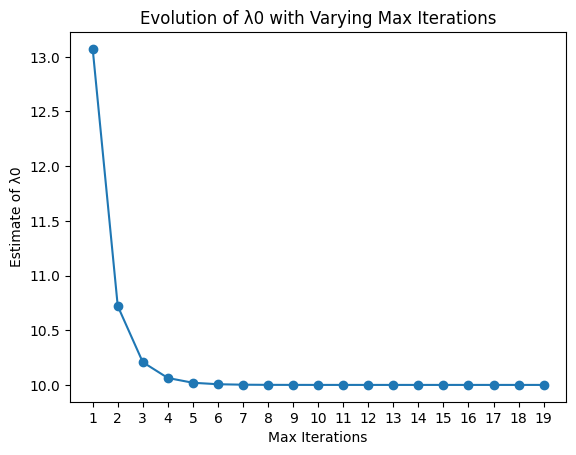

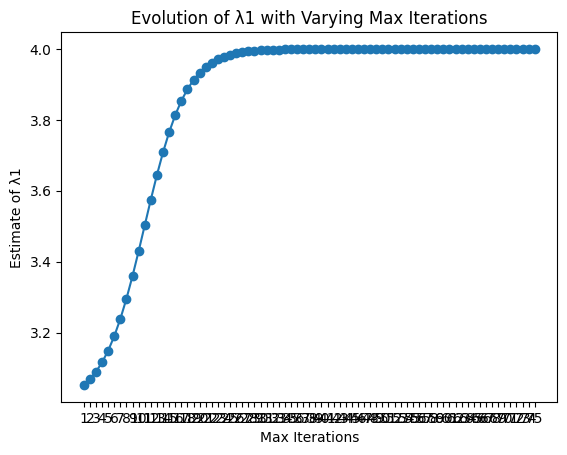

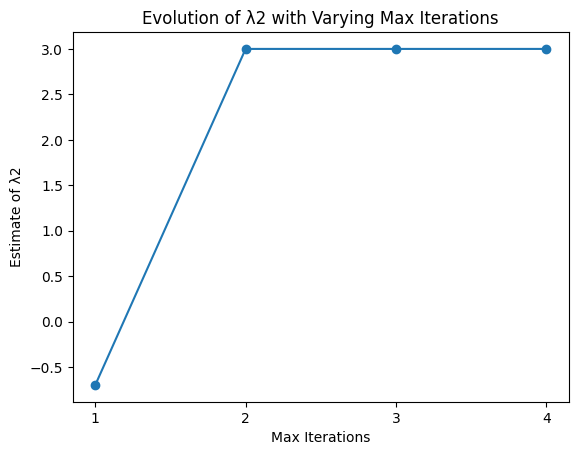

In [ ]:
#Calcul de toute les VP (méthode déflation)
Maxiter= 200
Tol= 1e-9
 
lambda_values_global, U_final,k_final, errors_final = Defl(A, x0, Maxiter, Tol)


# Plot the results

for i in range( len(lambda_values_global) ):

    maxiters = range(1, k_final[i]+1)

    plt.plot(maxiters,lambda_values_global[i], marker='o')
    plt.xlabel('Max Iterations')
    plt.ylabel(f'Estimate of λ{i}')
    plt.title(f'Evolution of λ{i} with Varying Max Iterations')

    # Set x-axis ticks to integers
    plt.xticks(maxiters)    

    plt.show()
